### Import the required libraries

In [1]:
import os
import pandas as pd
import pathlib

### Importing Data Sets

In [2]:
# Define the directory containing the CSV files
directory = pathlib.Path('C:/File/Python Project 01/Data')

In [4]:
# List to store DataFrames
dataframes_list = []

In [8]:
# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = directory / filename
        print(file_path)
        # Read the CSV file and append to list
        dataframes_list.append(pd.read_csv(file_path))

C:\File\Python Project 01\Data\2010.csv
C:\File\Python Project 01\Data\2011.csv
C:\File\Python Project 01\Data\2012.csv
C:\File\Python Project 01\Data\2013.csv
C:\File\Python Project 01\Data\2014.csv
C:\File\Python Project 01\Data\2015.csv
C:\File\Python Project 01\Data\2016.csv
C:\File\Python Project 01\Data\2017.csv
C:\File\Python Project 01\Data\2018.csv
C:\File\Python Project 01\Data\2019.csv


In [9]:
# Concatenate all the DataFrames in the list
combined_dataframe = pd.concat(dataframes_list)

### Data Wrangling

In [10]:
combined_dataframe.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [12]:
# Rename column 'Unnamed:0' to 'Id'
combined_dataframe.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
combined_dataframe.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [33]:
# Create a file csv
combined_dataframe.to_csv('top_spotify_songs.csv',index=True)

In [32]:
# Data type
combined_dataframe.dtypes

Id            int64
title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

### Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

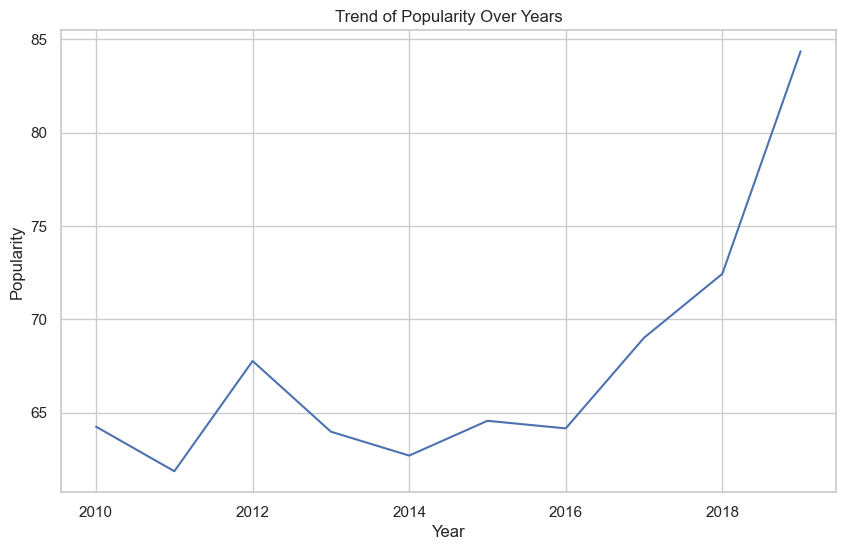

In [34]:
# Line Chart: Trend of Popularity Over Years
plt.figure(figsize=(10,6))
sns.lineplot(data=combined_dataframe, x='year', y='pop',errorbar=None)
plt.title("Trend of Popularity Over Years")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

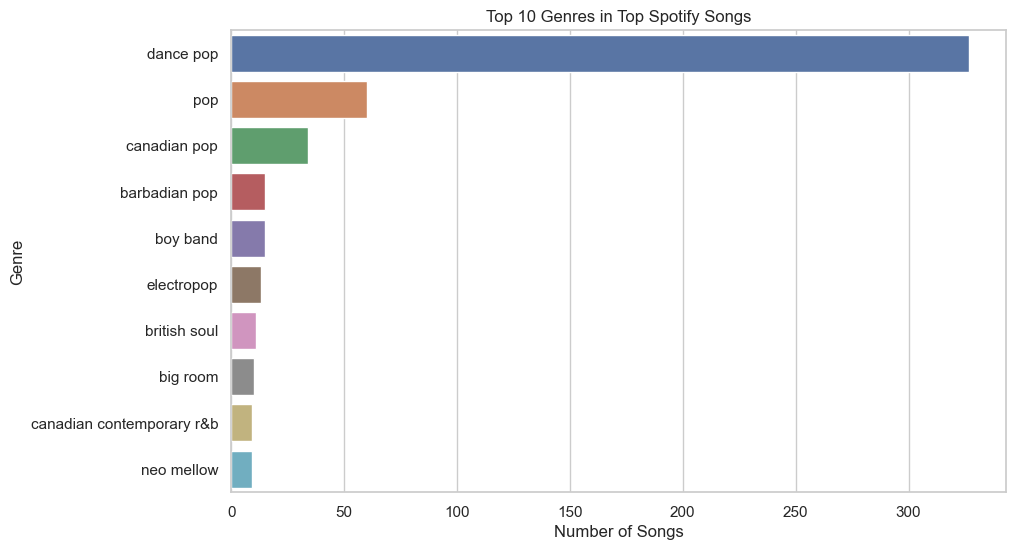

In [27]:
# Bar Chart: Distribution of Top Genres
plt.figure(figsize=(10, 6))
top_genres = combined_dataframe['top genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres in Top Spotify Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

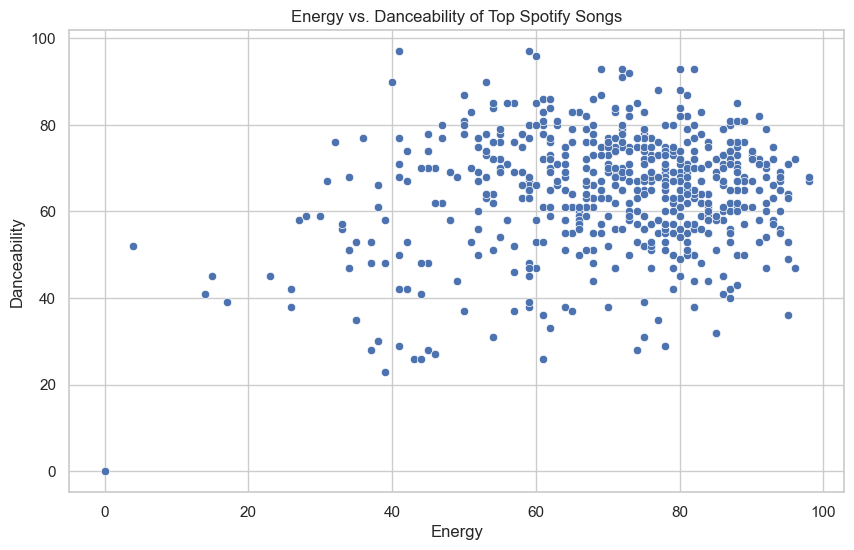

In [28]:
# Scatter Plot: Energy vs. Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_dataframe, x='nrgy', y='dnce')
plt.title('Energy vs. Danceability of Top Spotify Songs')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

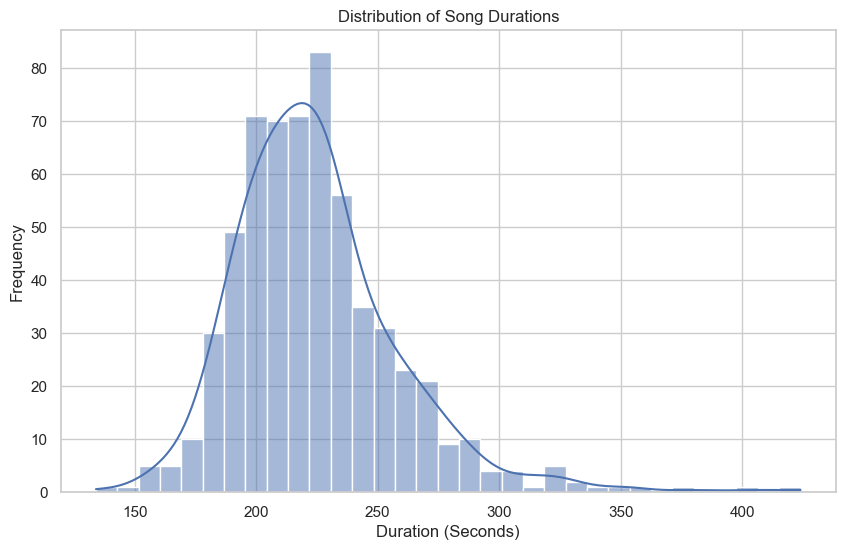

In [29]:
# Histogram: Distribution of Song Durations
plt.figure(figsize=(10, 6))
sns.histplot(combined_dataframe['dur'], kde=True)
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

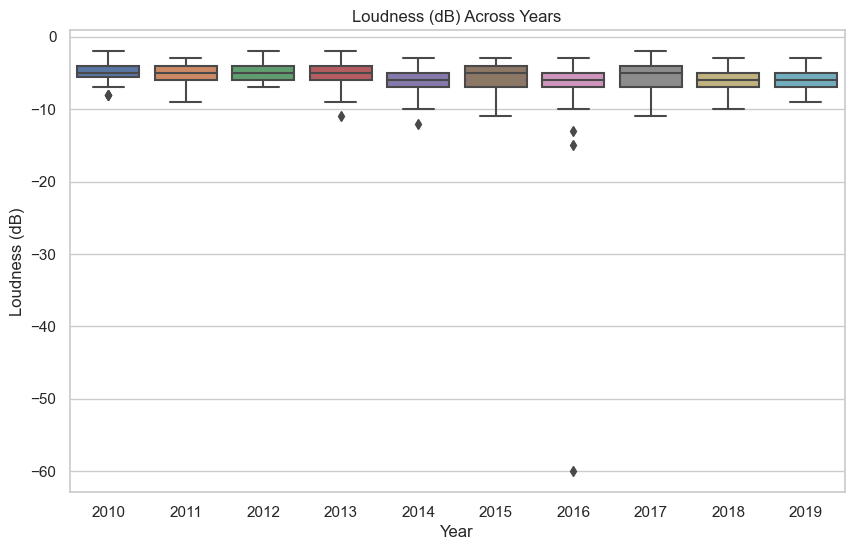

In [30]:
# Box Plot: Loudness Across Years
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_dataframe, x='year', y='dB')
plt.title('Loudness (dB) Across Years')
plt.xlabel('Year')
plt.ylabel('Loudness (dB)')
plt.show()

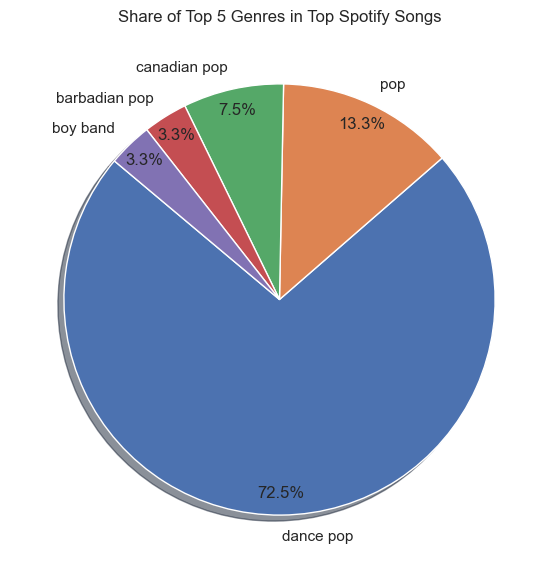

In [54]:
# Pie Chart: Share of Top 5 Genres
top_5_genres = combined_dataframe['top genre'].value_counts().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140, pctdistance=0.9, shadow=True)
plt.title('Share of Top 5 Genres in Top Spotify Songs')

plt.show()

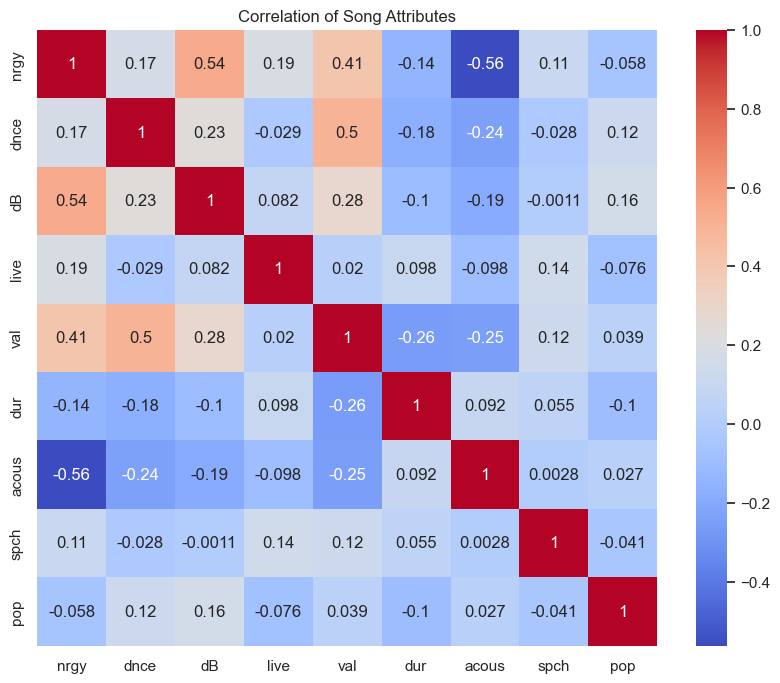

In [50]:
# Heatmap: Correlation of Song Attributes
correlation_data = combined_dataframe[['nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation of Song Attributes')
plt.show()

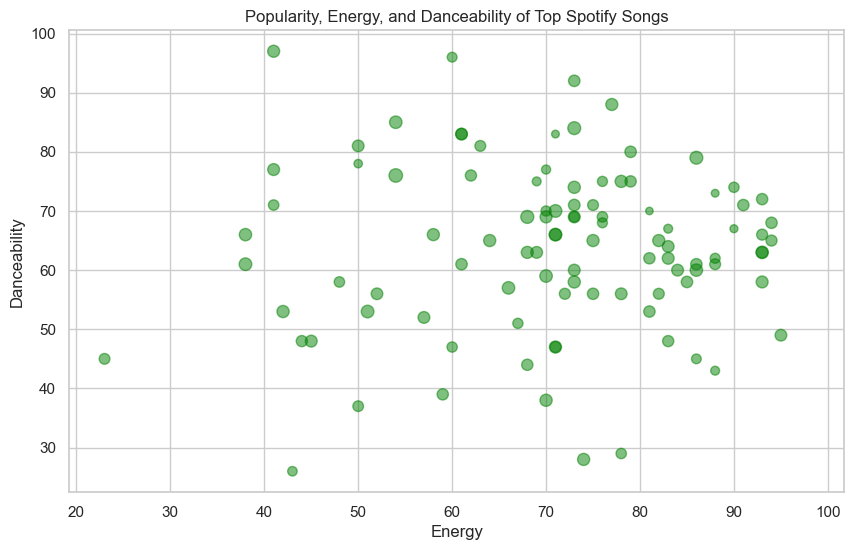

In [55]:
# Bubble Chart: Popularity, Energy, and Danceability
# Using a sample for clearer visualization
bubble_chart_data = combined_dataframe.sample(n=100)

plt.figure(figsize=(10, 6))
plt.scatter('nrgy', 'dnce', s='pop', alpha=0.5, color='green', data=bubble_chart_data)
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Popularity, Energy, and Danceability of Top Spotify Songs')
plt.show()

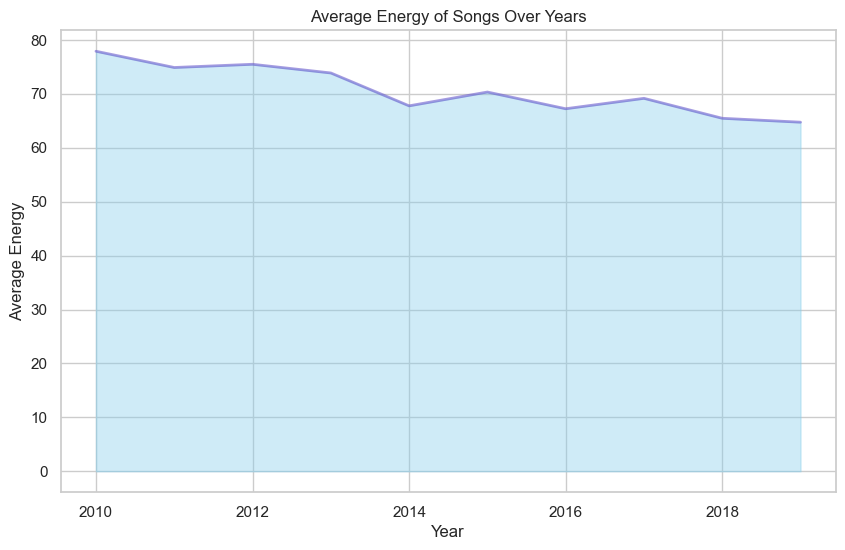

In [56]:
# Area Chart: Energy Over Years
# Short Data
combined_dataframe_short = combined_dataframe.drop(columns=['title', 'artist', 'top genre'])
# Aggregating data by year
yearly_data = combined_dataframe_short.groupby('year').mean()

plt.figure(figsize=(10, 6))
plt.fill_between(yearly_data.index, yearly_data['nrgy'], color="skyblue", alpha=0.4)
plt.plot(yearly_data.index, yearly_data['nrgy'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Average Energy of Songs Over Years')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.show()

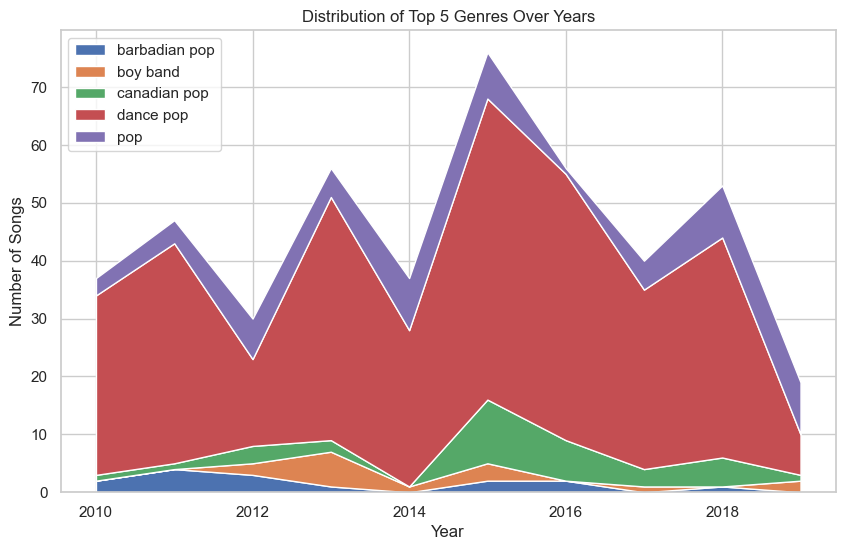

In [57]:
# Stacked Area Chart: Distribution of Top 5 Genres Over Years
# Preparing data for stacked area chart
top_genres_yearly = combined_dataframe[combined_dataframe['top genre'].isin(top_5_genres.index)]
stacked_area_data = top_genres_yearly.pivot_table(index='year', columns='top genre', values='Id', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 6))
plt.stackplot(stacked_area_data.index, stacked_area_data.T, labels=stacked_area_data.columns)
plt.title('Distribution of Top 5 Genres Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(loc='upper left')
plt.show()

In [58]:
# #### The most popular song in the dataset
most_popular = combined_dataframe.sort_values(by=['pop'], ascending=False)
most_popular.head(1)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


The most popular artist(s) with the highest song count:
Index(['Katy Perry'], dtype='object', name='artist')


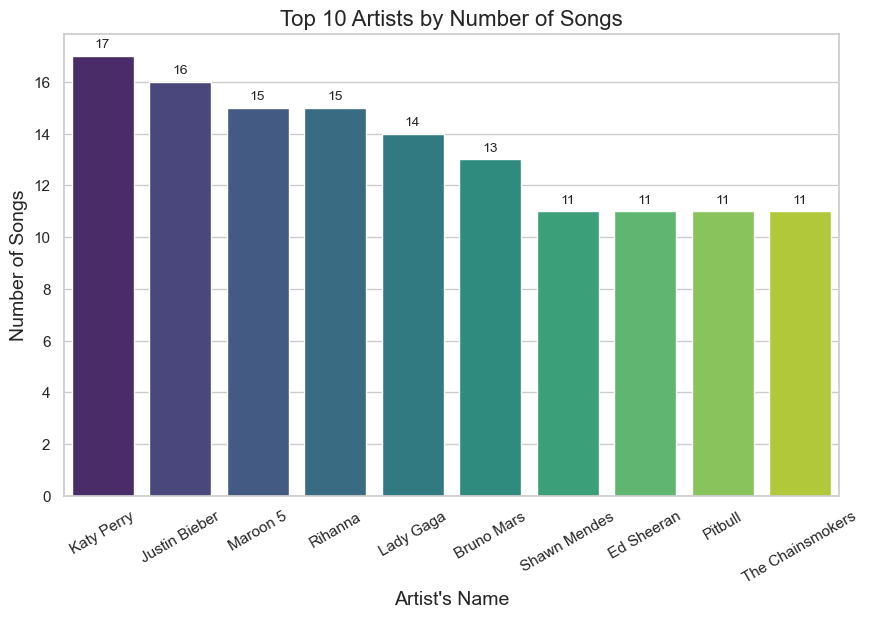

In [63]:
##### The artist has the most songs in the dataset?
# Group data by artist's name and count occurrences
Count_Most_Artist = combined_dataframe.groupby('artist').count().sort_values(by='Id', ascending=False)

# Find the maximum song count and display the most popular artist(s)
Max_Count = Count_Most_Artist['Id'].max()
List_Most_Popular_Songs = Count_Most_Artist[Count_Most_Artist['Id'] == Max_Count].index
print("The most popular artist(s) with the highest song count:")
print(List_Most_Popular_Songs)

# Plot the top 10 artists with the highest song counts
ShortCount_Most_Artist = Count_Most_Artist[['Id']].head(10).reset_index()

plt.figure(figsize=(10, 6))
plots = sns.barplot(x='artist', y='Id', data=ShortCount_Most_Artist, palette='viridis')

# Add value labels above each bar
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=10, xytext=(0, 8),
                   textcoords='offset points')

# Configure plot labels and title
plt.xlabel("Artist's Name", size=14)
plt.xticks(rotation=30)
plt.ylabel("Number of Songs", size=14)
plt.title("Top 10 Artists by Number of Songs", size=16)

# Show the plot
plt.show()


In [64]:
# Are there any songs in the dataset more than once?
# Group data by song's name to count the most popular song by 'Id'
Count_Most_Popular = combined_dataframe.groupby('title').count().sort_values(by = 'Id', ascending = False).Id

# Display the most popular name songs in dataset
List_Most_Popular_Songs = Count_Most_Popular[Count_Most_Popular >= 2].count()
print('There are ', List_Most_Popular_Songs, 'songs in the dataset more than once')

There are  19 songs in the dataset more than once


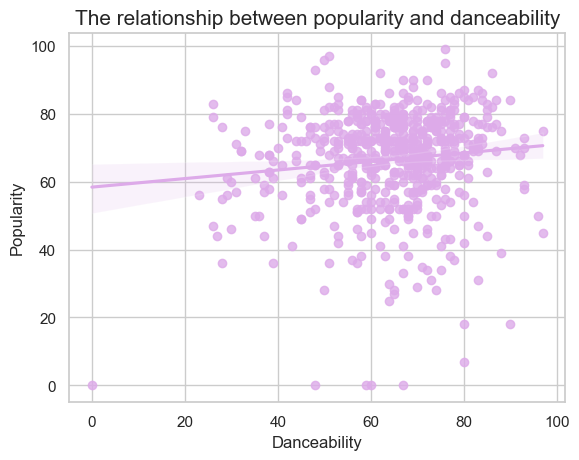

In [68]:
# Relationship between popularity and danceability
sns.regplot(data = combined_dataframe, x='dnce', y='pop', color="#DDAAE9")
plt.title('The relationship between popularity and danceability', fontsize = 15)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

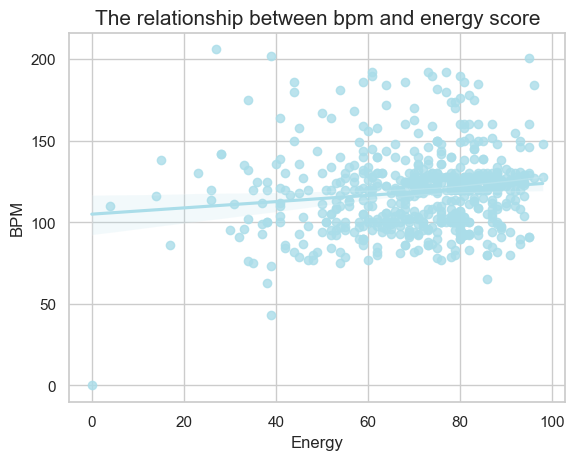

In [69]:
# Relationship between bpm and energy score
sns.regplot(data = combined_dataframe, x='nrgy', y='bpm', color="#AADDE9")
plt.title('The relationship between bpm and energy score', fontsize = 15)
plt.xlabel("Energy")
plt.ylabel("BPM")
plt.show()